In [1]:
# general and data handling
import numpy as np
import pandas as pd
import os
from collections import Counter

# Required RDKit modules
import rdkit as rd
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import RDConfig
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdMolDescriptors import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs import Torsions
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys

# modeling
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
#from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
#Import File:
mcf7 = pd.read_csv('mcf-7.csv')
breast = pd.read_csv('breast.csv')
lung = pd.read_csv('V1/lung_V1.csv')
a549 = pd.read_csv('V1/a549_V1.csv')

In [3]:
print('MCF7 :',len(mcf7))
print('Breast :',len(breast))
print('Lung :',len(lung))
print('A549 :',len(a549))

MCF7 : 464
Breast : 548
Lung : 592
A549 : 375


In [4]:
mcf7["mol"] = [Chem.MolFromSmiles(x) for x in mcf7["CanonicalSMILES"]]
breast["mol"] = [Chem.MolFromSmiles(x) for x in breast["CanonicalSMILES"]]
lung["mol"] = [Chem.MolFromSmiles(x) for x in lung["CanonicalSMILES"]]
a549["mol"] = [Chem.MolFromSmiles(x) for x in a549["CanonicalSMILES"]]

In [5]:
print('MCF7 SMiles:',mcf7['CanonicalSMILES'].count())
print('Breast Smiles:',breast['CanonicalSMILES'].count())
print('lung Smiles:',lung['CanonicalSMILES'].count())
print('A549 Smiles:',a549['CanonicalSMILES'].count())

MCF7 SMiles: 464
Breast Smiles: 548
lung Smiles: 592
A549 Smiles: 375


In [6]:
# Maccs
mcf7["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in mcf7["mol"]]
breast["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in breast["mol"]]
lung["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in lung["mol"]]
a549["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in a549["mol"]]

In [7]:
# Morgan 2:
mcf7["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in mcf7["mol"]]
breast["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in breast["mol"]]
lung["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in lung["mol"]]
a549["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in a549["mol"]]

In [8]:
train_mcf7, test_mcf7 = train_test_split(mcf7, test_size=0.2, random_state=1,stratify=mcf7.Target.values)
train_breast, test_breast = train_test_split(breast, test_size=0.2, random_state=1,stratify=breast.Target.values)
train_lung, test_lung = train_test_split(lung, test_size=0.2, random_state=1,stratify=lung.Target.values)
train_a549, test_a549 = train_test_split(a549, test_size=0.2, random_state=1,stratify=a549.Target.values)

print('Training Data for MCF7:',len(train_mcf7),'\n')
print('Testing Data for MCF7:',len(test_mcf7),'\n')
print('***************************************************************************')
print('Training Data for Breast:',len(train_breast),'\n')
print('Testing Data for Breast:',len(test_breast),'\n')
print('***************************************************************************')
print('Training Data for lung:',len(train_lung),'\n')
print('Testing Data for lung:',len(test_lung),'\n')
print('***************************************************************************')
print('Training Data for a549:',len(train_a549),'\n')
print('Testing Data for a549:',len(test_a549),'\n')

Training Data for MCF7: 371 

Testing Data for MCF7: 93 

***************************************************************************
Training Data for Breast: 438 

Testing Data for Breast: 110 

***************************************************************************
Training Data for lung: 473 

Testing Data for lung: 119 

***************************************************************************
Training Data for a549: 300 

Testing Data for a549: 75 



In [9]:
def Counting(y):
    unique, counts = np.unique(y, return_counts=True)
    a=dict(zip(unique, counts))
    return str(a)

In [10]:
print('Train Set for MCF7 has:',Counting(train_mcf7['Target']))
print('Test Set for MCF7 has:',Counting(test_mcf7['Target']))
print('*********************************************************************')
print('Train Set for Breast has:',Counting(train_breast['Target']))
print('Test Set for Breast has:',Counting(test_breast['Target']))
print('*********************************************************************')
print('Train Set for Lung has:',Counting(train_lung['Target']))
print('Test Set for Lung has:',Counting(test_lung['Target']))
print('*********************************************************************')
print('Train Set for A549 has:',Counting(train_a549['Target']))
print('Test Set for A549 has:',Counting(test_a549['Target']))

Train Set for MCF7 has: {0: 204, 1: 167}
Test Set for MCF7 has: {0: 51, 1: 42}
*********************************************************************
Train Set for Breast has: {0: 236, 1: 202}
Test Set for Breast has: {0: 59, 1: 51}
*********************************************************************
Train Set for Lung has: {0: 249, 1: 224}
Test Set for Lung has: {0: 63, 1: 56}
*********************************************************************
Train Set for A549 has: {0: 157, 1: 143}
Test Set for A549 has: {0: 39, 1: 36}


In [11]:
def to_bit(fps):
    fp_np = []
    for fp in fps:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        fp_np.append(arr)
    test = fp_np
    return test

In [12]:
# MACCS Fingreprint:  # MCF7
X_Macc_train_mcf7=to_bit(train_mcf7['Maccs'])
y_Macc_train_mcf7=train_mcf7.Target.values

X_Macc_test_mcf7=to_bit(test_mcf7['Maccs'])
y_Macc_test_mcf7=test_mcf7.Target.values

In [13]:
# MACCS Fingreprint:  #Breast
X_Macc_train_breast=to_bit(train_breast['Maccs'])
y_Macc_train_breast=train_breast.Target.values

X_Macc_test_breast=to_bit(test_breast['Maccs'])
y_Macc_test_breast=test_breast.Target.values

In [14]:
# MACCS Fingreprint:  # Lung
X_Macc_train_lung=to_bit(train_lung['Maccs'])
y_Macc_train_lung=train_lung.Target.values

X_Macc_test_lung=to_bit(test_lung['Maccs'])
y_Macc_test_lung=test_lung.Target.values

In [15]:
# MACCS Fingreprint:  # A549
X_Macc_train_a549=to_bit(train_a549['Maccs'])
y_Macc_train_a549=train_a549.Target.values

X_Macc_test_a549=to_bit(test_a549['Maccs'])
y_Macc_test_a549=test_a549.Target.values

In [16]:
# Morgan 2 Fingreprint:   #MCF7
X_Morgan2_train_mcf7=to_bit(train_mcf7['morg2_fp'])
y_Morgan2_train_mcf7=train_mcf7.Target.values

X_Morgan2_test_mcf7=to_bit(test_mcf7['morg2_fp'])
y_Morgan2_test_mcf7=test_mcf7.Target.values

In [17]:
# Morgan 2 Fingreprint:  #Breast
X_Morgan2_train_breast=to_bit(train_breast['morg2_fp'])
y_Morgan2_train_breast=train_breast.Target.values

X_Morgan2_test_breast=to_bit(test_breast['morg2_fp'])
y_Morgan2_test_breast=test_breast.Target.values

In [18]:
# Morgan 2 Fingreprint:   #Lung
X_Morgan2_train_lung=to_bit(train_lung['morg2_fp'])
y_Morgan2_train_lung=train_lung.Target.values

X_Morgan2_test_lung=to_bit(test_lung['morg2_fp'])
y_Morgan2_test_lung=test_lung.Target.values

In [19]:
# Morgan 2 Fingreprint:   #A549
X_Morgan2_train_a549=to_bit(train_a549['morg2_fp'])
y_Morgan2_train_a549=train_a549.Target.values

X_Morgan2_test_a549=to_bit(test_a549['morg2_fp'])
y_Morgan2_test_a549=test_a549.Target.values

------------------------------------------------------------------------------------------------------------------

### Morgan2 Tanimoto :

In [20]:
fps_breast = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in breast["mol"]]
fps_lung =   [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in lung["mol"]]

In [21]:
fps = fps_lung
scores = []

for i in range(0, len(fps)) :

    if (i == 0) :
        print("Processing compound ", end='')
    
    if (i % 50 == 0) :
        print(i, end=' ')
    
    for j in range(i+1, len(fps)) :
        scores.append(DataStructs.FingerprintSimilarity(fps[i], fps[j]))

print("Done!")
print("# Number of scores : ", len(scores))

Processing compound 0 50 100 150 200 250 300 350 400 450 500 550 Done!
# Number of scores :  174936


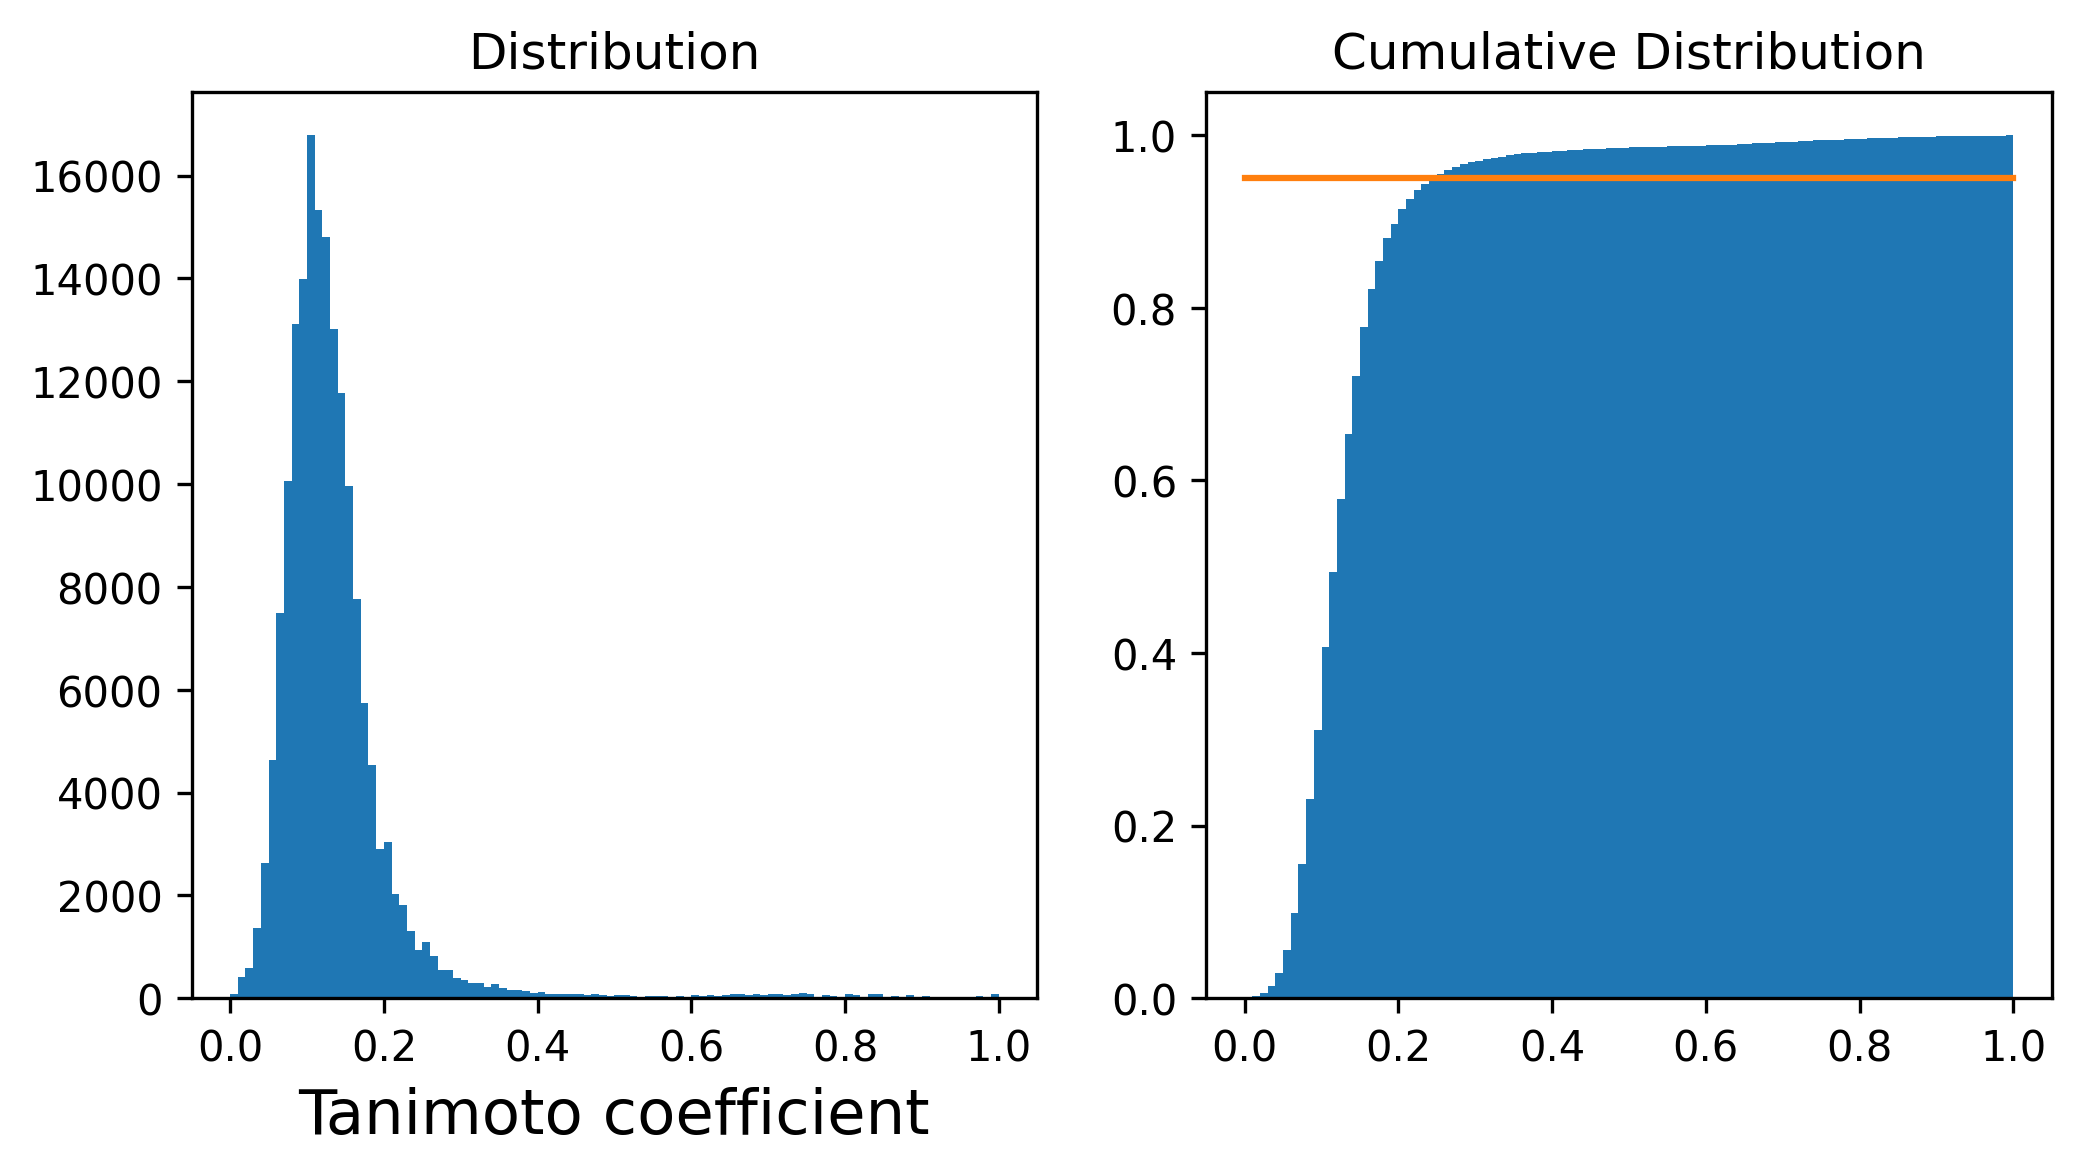

In [22]:
mybins = [ x * 0.01 for x in range(101)]

fig = plt.figure(figsize=(8,4), dpi=300)

plt.subplot(1, 2, 1)
plt.title("Distribution")
plt.xlabel('Frequency',size=15)
plt.xlabel('Tanimoto coefficient',size=15)
plt.hist(scores, bins=mybins)

plt.subplot(1, 2, 2)
plt.title("Cumulative Distribution")
plt.hist(scores, bins=mybins, density=True, cumulative=1)
plt.plot([0,1],[0.95,0.95]);

In [23]:
for i in range(51) :

    thresh = i / 50
    num_similar_pairs = len([x for x in scores if x >= thresh]) 
    prob = num_similar_pairs / len(scores) * 100
    print("%.3f %8d (%8.4f %%)" % (thresh, num_similar_pairs, round(prob,4)))

0.000   174936 (100.0000 %)
0.020   174437 ( 99.7148 %)
0.040   172495 ( 98.6046 %)
0.060   165221 ( 94.4465 %)
0.080   147677 ( 84.4177 %)
0.100   120570 ( 68.9223 %)
0.120    88463 ( 50.5688 %)
0.140    60642 ( 34.6652 %)
0.160    38912 ( 22.2436 %)
0.180    25398 ( 14.5185 %)
0.200    17969 ( 10.2718 %)
0.220    12915 (  7.3827 %)
0.240     9802 (  5.6032 %)
0.260     7777 (  4.4456 %)
0.280     6403 (  3.6602 %)
0.300     5469 (  3.1263 %)
0.320     4819 (  2.7547 %)
0.340     4307 (  2.4620 %)
0.360     3837 (  2.1934 %)
0.380     3511 (  2.0070 %)
0.400     3286 (  1.8784 %)
0.420     3082 (  1.7618 %)
0.440     2931 (  1.6755 %)
0.460     2779 (  1.5886 %)
0.480     2632 (  1.5046 %)
0.500     2518 (  1.4394 %)
0.520     2396 (  1.3696 %)
0.540     2317 (  1.3245 %)
0.560     2247 (  1.2845 %)
0.580     2174 (  1.2427 %)
0.600     2099 (  1.1999 %)
0.620     1994 (  1.1398 %)
0.640     1880 (  1.0747 %)
0.660     1735 (  0.9918 %)
0.680     1594 (  0.9112 %)
0.700     1443 (  0.

-----------------------------------------------------------------------------------------------------------------

### Active and Inactive Representation:

In [111]:
# PCA For Dimension Reduction:
pca = PCA(n_components=2)

In [175]:
pca = PCA(n_components=2).fit(x_macc)
new_df = pca.transform(x_macc)
new_df

array([[ 3.14691696,  1.31503534],
       [-2.17281098,  2.05370829],
       [-2.17281098,  2.05370829],
       ...,
       [ 2.10161067,  0.54902198],
       [-1.5291198 , -1.13823597],
       [-1.26810143, -0.10265432]])

In [176]:
X_pca

array([[ 3.14691696,  1.31503534],
       [-2.17281098,  2.0537081 ],
       [-2.17281098,  2.0537081 ],
       ...,
       [ 2.10161067,  0.5490232 ],
       [-1.52911979, -1.13823593],
       [-1.26810143, -0.10265442]])

In [173]:
a=pca.explained_variance_ratio_
a

array([0.23262822, 0.10024776])

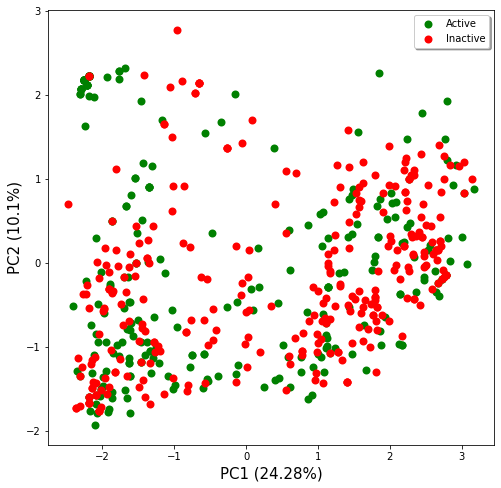

In [182]:
# Lung
x_macc = to_bit(lung["Maccs"])

# Apply PCA on DataFrame:
pca = PCA(n_components=2).fit(x_macc)
X_pca = pca.transform(x_macc)
var = pca.explained_variance_ratio_
#X_pca = pca.fit_transform(x_macc)  explained_variance_ratio_ not work with fit_transform as it is not PCA object

y = lung.Target.values
# Generating PCA Scatter Plot:
target_names = ['Active','Inactive']
colors = ['green', 'red']
plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [1,0], target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],color=color, lw=2, label=target_name)
#plt.title("PCA Scatter Plot for MACCS BREAST dataset:",size = 20)
plt.xlabel('PC1 ('+str(round(var[0]*100,2))+'%)',size = 15)
plt.ylabel('PC2 ('+str(round(var[1]*100,2))+'%)',size = 15)
plt.legend(loc="best", shadow=True, scatterpoints=1)

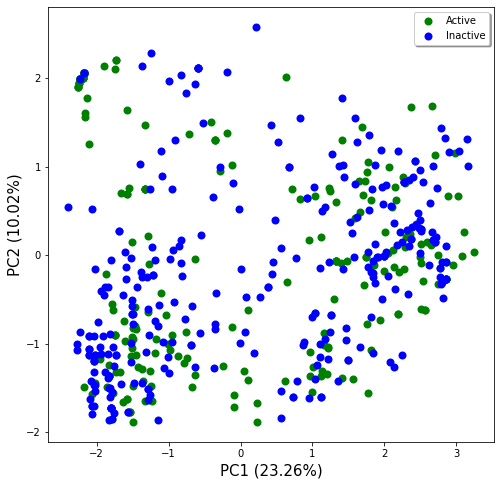

In [184]:
# Breast
x_macc = to_bit(breast["Maccs"])

# Apply PCA on DataFrame:
X_pca = pca.fit_transform(x_macc)
y = breast.Target.values

# Generating PCA Scatter Plot:
target_names = ['Active','Inactive']
colors = ['green', 'blue']
plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [1,0], target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],color=color, lw=2, label=target_name)
#plt.title("PCA Scatter Plot for MACCS BREAST dataset:",size = 20)

plt.legend(loc="best", shadow=True, scatterpoints=1)

-------------------------------------------------------------------------------------------------------------------

### Train Test Split Visualization:

In [92]:
# PCA For Dimension Reduction:
pca = PCA(n_components=2)

In [93]:
test_mcf7.head()

,NPACT_ID,Compound_Names,CanonicalSMILES,IsomericSMILES,Smiles,InchiKey,PubChem_ID,Cell Line,Cancer,Target,mol,Maccs,morg2_fp,Split
119,NPACT01161,canthin-6-one 9-O-beta-glucopyranoside,C1=CC2=C(C=C1OC3C(C(C(C(O3)CO)O)O)O)N4C(=O)C=C...,C1=CC2=C(C=C1O[C@H]3[C@@H]([C@H]([C@@H]([C@H](...,O1[C@@H]([C@@H](O)[C@H](O)[C@@H](O)[C@@H]1Oc1c...,MWPUPIWCFYQPEG-LWUBGYQZSA-N,637482,MCF-7,Breast,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0
459,New11,Mansorin C,CC1COC2=C(C(=O)OC3=C(C=CC1=C32)C)C,Not Found,NaN,NaN,5275543,MCF-7,Breast,1,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
203,NPACT00796,N6-isopentenyladenosine,CC(=CCNC1=C2C(=NC=N1)N(C=N2)C3C(C(C(O3)CO)O)O)C,CC(=CCNC1=C2C(=NC=N1)N(C=N2)C3C(C(C(O3)CO)O)O)C,O1[C@H](n2c3ncnc(NCC=C(C)C)c3nc2)[C@@H](O)[C@H...,USVMJSALORZVDV-UHFFFAOYSA-N,266767,MCF-7,Breast,1,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
171,NPACT00905,Resveratrol,C1=CC(=CC=C1C=CC2=CC(=CC(=C2)O)O)O,C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)O)O)O,Oc1cc(/C=C/c2ccc(O)cc2)cc(O)c1,LUKBXSAWLPMMSZ-OWOJBTEDSA-N,445154,MCF-7,Breast,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
115,NPACT01191,dimethylmatairesinol,COC1=C(C=C(C=C1)CC2COC(=O)C2CC3=CC(=C(C=C3)OC)...,COC1=C(C=C(C=C1)CC2COC(=O)C2CC3=CC(=C(C=C3)OC)...,O1CC(C(Cc2cc(OC)c(OC)cc2)C1=O)Cc1cc(OC)c(OC)cc1,SNAOLIMFHAAIER-UHFFFAOYSA-N,1286,MCF-7,Breast,1,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


In [99]:
train_mcf7['Split']=['1']*len(train_mcf7['NPACT_ID'])
test_mcf7['Split']=['0']*len(test_mcf7['NPACT_ID'])
alll = pd.concat([train_mcf7,test_mcf7])

In [100]:
X_Maccs=to_bit(alll['Maccs'])
y=alll.Split.values
X_pca = pca.fit_transform(X_Maccs)

#### MCF7 Maccs:

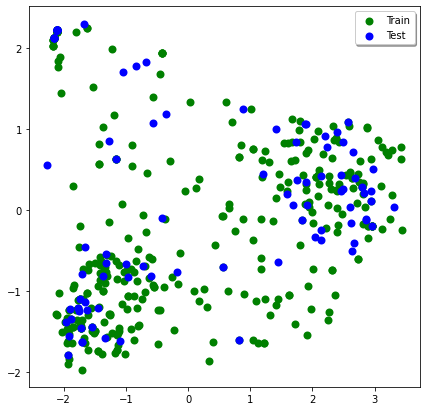

In [101]:
# Generating PCA Scatter Plot:
target_names = ['Train','Test']
colors = ['green', 'blue']
plt.figure(figsize=(7, 7))
for color, i, target_name in zip(colors, ['1','0'], target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],color=color, lw=2, label=target_name)
#plt.title("PCA Scatter Plot for Train Test Split:",size = 20)
plt.legend(loc="best", shadow=True, scatterpoints=1)

### breast Maccs:

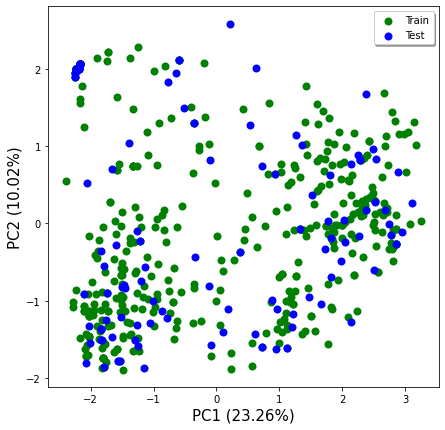

In [186]:
train_breast['Split']=['1']*len(train_breast['NPACT_ID'])
test_breast['Split']=['0']*len(test_breast['NPACT_ID'])
alll = pd.concat([train_breast,test_breast])

X_Maccs=to_bit(alll['Maccs'])
y=alll.Split.values

pca = PCA(n_components=2).fit(X_Maccs)
X_pca = pca.transform(X_Maccs)
var = pca.explained_variance_ratio_

# Generating PCA Scatter Plot:

target_names = ['Train','Test']
colors = ['green', 'blue']
plt.figure(figsize=(7, 7))
for color, i, target_name in zip(colors, ['1','0'], target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],color=color, lw=2, label=target_name)
#plt.title("PCA Scatter Plot for Train Test Split:",size = 20)
plt.xlabel('PC1 ('+str(round(var[0]*100,2))+'%)',size = 15)
plt.ylabel('PC2 ('+str(round(var[1]*100,2))+'%)',size = 15)
plt.legend(loc="best", shadow=True, scatterpoints=1)

### Lung:

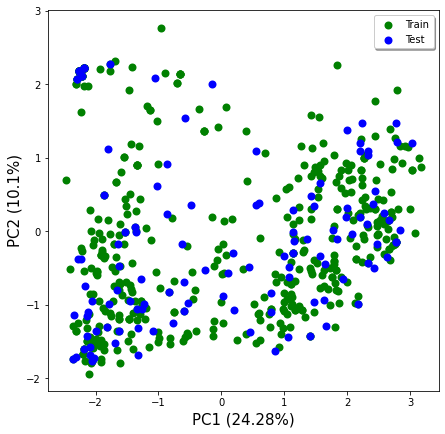

In [187]:
train_lung['Split']=['1']*len(train_lung['NPACT_ID'])
test_lung['Split']=['0']*len(test_lung['NPACT_ID'])
alll = pd.concat([train_lung,test_lung])

X = to_bit(alll['Maccs'])
y = alll.Split.values

pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
var = pca.explained_variance_ratio_

# Generating PCA Scatter Plot:
target_names = ['Train','Test']
colors = ['green', 'blue']
plt.figure(figsize=(7, 7))
for color, i, target_name in zip(colors, ['1','0'], target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],color=color, lw=2, label=target_name)
#plt.title("PCA Scatter Plot for Train Test Split:",size = 20)
plt.xlabel('PC1 ('+str(round(var[0]*100,2))+'%)',size = 15)
plt.ylabel('PC2 ('+str(round(var[1]*100,2))+'%)',size = 15)
plt.legend(loc="best", shadow=True, scatterpoints=1)

### A549 Morgan2:

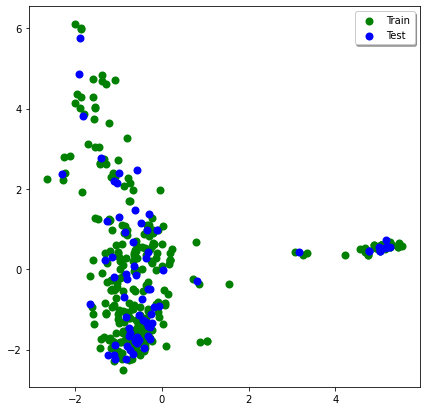

In [27]:
train_a549['Split']=['1']*len(train_a549['NPACT_ID'])
test_a549['Split']=['0']*len(test_a549['NPACT_ID'])
alll = pd.concat([train_a549,test_a549])

X_Morgan2=to_bit(alll['morg2_fp'])
y=alll.Split.values
X_pca = pca.fit_transform(X_Morgan2)
# Generating PCA Scatter Plot:
target_names = ['Train','Test']
colors = ['green', 'blue']
plt.figure(figsize=(7, 7))
for color, i, target_name in zip(colors, ['1','0'], target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],color=color, lw=2, label=target_name)
#plt.title("PCA Scatter Plot for Train Test Split:",size = 20)
plt.legend(loc="best", shadow=True, scatterpoints=1)

# Roc-Auc all Model:

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from matplotlib import pyplot
from xgboost import XGBClassifier

In [29]:
#all_roc(RF,SVM,KNN,XGB,y-Test,title)

def all_roc(prediction_rf_probs,prediction_svm_probs,prediction_knn_probs,prediction_xgb_probs,y_test,title):
    
    ns_probs1 = [0 for _ in range(len(y_test))]

    prediction_rf_probs1=prediction_rf_probs[:,1]
    prediction_svm_probs1=prediction_svm_probs[:,1]
    prediction_knn_probs1=prediction_knn_probs[:,1]
    prediction_xgb_probs1=prediction_xgb_probs[:,1]

    prediction_rf_probs_auc = round(roc_auc_score(y_test, prediction_rf_probs1),3)
    prediction_svm_auc = round(roc_auc_score(y_test, prediction_svm_probs1),3)
    prediction_knn_auc = round(roc_auc_score(y_test, prediction_knn_probs1),3)
    prediction_xgb_probs_auc = round(roc_auc_score(y_test, prediction_xgb_probs1),3)

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs1)

    prediction_rf_probs1_fpr, prediction_rf_probs1_tpr, _ = roc_curve(y_test, prediction_rf_probs1)
    prediction_svm_probs1_fpr, prediction_svm_probs1_tpr, _ = roc_curve(y_test, prediction_svm_probs1)
    prediction_knn_probs1_fpr, prediction_knn_probs1_tpr, _ = roc_curve(y_test, prediction_knn_probs1)
    prediction_xgb_probs1_fpr, prediction_xgb_probs1_tpr, _ = roc_curve(y_test, prediction_xgb_probs1)

    # plot the roc curve for the model
    plt.figure(figsize=(7, 5))
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(prediction_rf_probs1_fpr, prediction_rf_probs1_tpr, marker='.', label='RF : AUC = '+str(prediction_rf_probs_auc))
    pyplot.plot(prediction_svm_probs1_fpr, prediction_svm_probs1_tpr, marker='.', label='SVM : AUC = '+str(prediction_svm_auc))
    pyplot.plot(prediction_knn_probs1_fpr, prediction_knn_probs1_tpr, marker='.', label='KNN : AUC = '+str(prediction_knn_auc))
    pyplot.plot(prediction_xgb_probs1_fpr, prediction_xgb_probs1_tpr, marker='.', label='XGB :AUC = '+str(prediction_xgb_probs_auc))
    # axis labels
    plt.title(title,size = 20)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

## MACCS:

### MCF7:

In [62]:
best_model_rf_MCF7_Maccs = RandomForestClassifier(max_features='log2', n_estimators=137, random_state=1)

In [63]:
best_model_knn_MCF7_Maccs=KNeighborsClassifier(weights='distance',n_neighbors=4)

In [64]:
best_model_SVM_MCF7_Maccs=svm.SVC(C=7, gamma=0.064, random_state=1,probability=True)

In [65]:
best_model_xgb_MCF7_Maccs=XGBClassifier(use_label_encoder=False,n_estimators=72,gamma=0,random_state=1,eval_metric='error')

In [66]:
best_model_rf_MCF7_Maccs.fit(X_Macc_train_mcf7, y_Macc_train_mcf7)
best_model_knn_MCF7_Maccs.fit(X_Macc_train_mcf7, y_Macc_train_mcf7)
best_model_SVM_MCF7_Maccs.fit(X_Macc_train_mcf7, y_Macc_train_mcf7)
best_model_xgb_MCF7_Maccs.fit(np.array(X_Macc_train_mcf7), y_Macc_train_mcf7)

prediction_mcf7_maccs_rf_probs  = best_model_rf_MCF7_Maccs.predict_proba(X_Macc_test_mcf7)
prediction_mcf7_maccs_knn_probs = best_model_knn_MCF7_Maccs.predict_proba(X_Macc_test_mcf7)
prediction_mcf7_maccs_svm_probs = best_model_SVM_MCF7_Maccs.predict_proba(X_Macc_test_mcf7)
prediction_mcf7_maccs_xgb_probs = best_model_xgb_MCF7_Maccs.predict_proba(np.array(X_Macc_test_mcf7))

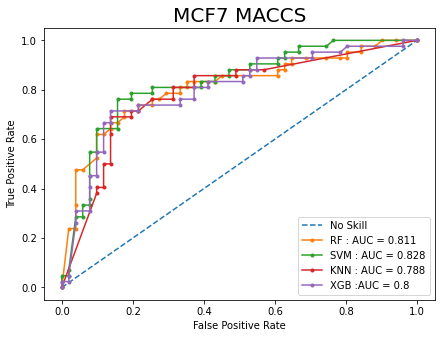

In [67]:
#all_roc(RF,SVM,KNN,XGB,y-Test,title)

RF  = prediction_mcf7_maccs_rf_probs
SVM = prediction_mcf7_maccs_svm_probs
KNN = prediction_mcf7_maccs_knn_probs
XGB = prediction_mcf7_maccs_xgb_probs
y_Test = y_Macc_test_mcf7
title="MCF7 MACCS"

all_roc(RF,SVM,KNN,XGB,y_Test,title)

### Breast:

In [86]:
best_model_rf_breast_Maccs=RandomForestClassifier(max_features='log2',n_estimators=19, random_state=1)

In [87]:
best_model_knn_breast_Maccs=KNeighborsClassifier(n_neighbors=3)

In [88]:
best_model_SVM_breast_Maccs=svm.SVC(C=4, gamma=0.053, random_state=1,probability=True)

In [89]:
best_model_xgb_breast_Maccs= XGBClassifier(use_label_encoder=False,n_estimators=21,gamma=0,random_state=1,eval_metric='error')

In [90]:
best_model_rf_breast_Maccs.fit(X_Macc_train_breast, y_Macc_train_breast)
best_model_knn_breast_Maccs.fit(X_Macc_train_breast, y_Macc_train_breast)
best_model_SVM_breast_Maccs.fit(X_Macc_train_breast, y_Macc_train_breast)
best_model_xgb_breast_Maccs.fit(np.array(X_Macc_train_breast), y_Macc_train_breast)

prediction_breast_maccs_rf_probs  = best_model_rf_breast_Maccs.predict_proba(X_Macc_test_breast)
prediction_breast_maccs_knn_probs = best_model_knn_breast_Maccs.predict_proba(X_Macc_test_breast)
prediction_breast_maccs_svm_probs = best_model_SVM_breast_Maccs.predict_proba(X_Macc_test_breast)
prediction_breast_maccs_xgb_probs = best_model_xgb_breast_Maccs.predict_proba(np.array(X_Macc_test_breast))

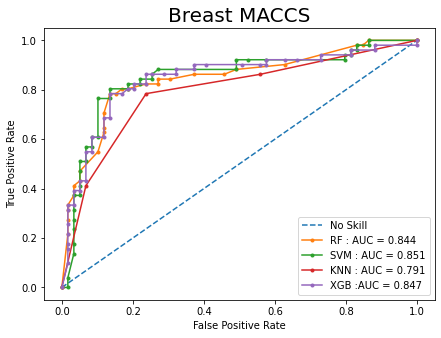

In [91]:
#all_roc(RF,SVM,KNN,XGB,y-Test,title)

RF  = prediction_breast_maccs_rf_probs
SVM = prediction_breast_maccs_svm_probs
KNN = prediction_breast_maccs_knn_probs
XGB = prediction_breast_maccs_xgb_probs
y_Test = y_Macc_test_breast
title="Breast MACCS"

all_roc(RF,SVM,KNN,XGB,y_Test,title)

### Lung

In [30]:
best_model_rf_lung_Maccs=RandomForestClassifier(criterion ='entropy',max_features='sqrt', n_estimators=17, random_state=1)

In [31]:
best_model_knn_lung_Maccs=KNeighborsClassifier(weights='distance',n_neighbors=3)

In [32]:
best_model_SVM_lung_Maccs=svm.SVC(C=8, gamma=0.078, random_state=1,probability=True)

In [33]:
best_model_xgb_lung_Maccs= XGBClassifier(use_label_encoder=False,n_estimators=58,gamma=0,random_state=1,eval_metric='error')

In [34]:
best_model_rf_lung_Maccs.fit(X_Macc_train_lung, y_Macc_train_lung)
best_model_knn_lung_Maccs.fit(X_Macc_train_lung, y_Macc_train_lung)
best_model_SVM_lung_Maccs.fit(X_Macc_train_lung, y_Macc_train_lung)
best_model_xgb_lung_Maccs.fit(np.array(X_Macc_train_lung), y_Macc_train_lung)

prediction_lung_maccs_rf_probs  = best_model_rf_lung_Maccs.predict_proba(X_Macc_test_lung)
prediction_lung_maccs_knn_probs = best_model_knn_lung_Maccs.predict_proba(X_Macc_test_lung)
prediction_lung_maccs_svm_probs = best_model_SVM_lung_Maccs.predict_proba(X_Macc_test_lung)
prediction_lung_maccs_xgb_probs = best_model_xgb_lung_Maccs.predict_proba(np.array(X_Macc_test_lung))

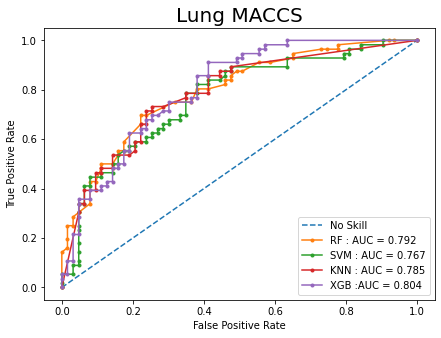

In [35]:
#all_roc(RF,SVM,KNN,XGB,y-Test,title)

RF  = prediction_lung_maccs_rf_probs
SVM = prediction_lung_maccs_svm_probs
KNN = prediction_lung_maccs_knn_probs
XGB = prediction_lung_maccs_xgb_probs
y_Test = y_Macc_test_lung
title="Lung MACCS"

all_roc(RF,SVM,KNN,XGB,y_Test,title)

### A549

In [38]:
best_model_rf_a549_Maccs=RandomForestClassifier(criterion= "entropy",max_features='sqrt', n_estimators=121, random_state=1)

In [39]:
best_model_knn_a549_Maccs=KNeighborsClassifier()

In [40]:
best_model_SVM_a549_Maccs=svm.SVC(C=7, gamma=0.081, random_state=1,probability=True)

In [41]:
best_model_xgb_a549_Maccs = XGBClassifier(use_label_encoder=False,n_estimators=10,gamma=0.5,random_state=1,eval_metric='error')

In [42]:
best_model_rf_a549_Maccs.fit(X_Macc_train_a549, y_Macc_train_a549)
best_model_knn_a549_Maccs.fit(X_Macc_train_a549, y_Macc_train_a549)
best_model_SVM_a549_Maccs.fit(X_Macc_train_a549, y_Macc_train_a549)
best_model_xgb_a549_Maccs.fit(np.array(X_Macc_train_a549), y_Macc_train_a549)

prediction_a549_maccs_rf_probs  = best_model_rf_a549_Maccs.predict_proba(X_Macc_test_a549)
prediction_a549_maccs_knn_probs = best_model_knn_a549_Maccs.predict_proba(X_Macc_test_a549)
prediction_a549_maccs_svm_probs = best_model_SVM_a549_Maccs.predict_proba(X_Macc_test_a549)
prediction_a549_maccs_xgb_probs = best_model_xgb_a549_Maccs.predict_proba(np.array(X_Macc_test_a549))

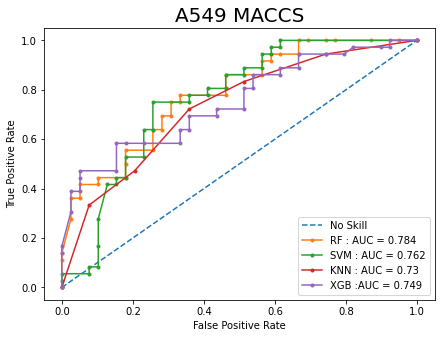

In [43]:
#all_roc(RF,SVM,KNN,XGB,y-Test,title)

RF  = prediction_a549_maccs_rf_probs
SVM = prediction_a549_maccs_svm_probs
KNN = prediction_a549_maccs_knn_probs
XGB = prediction_a549_maccs_xgb_probs
y_Test = y_Macc_test_a549
title="A549 MACCS"

all_roc(RF,SVM,KNN,XGB,y_Test,title)

## Morgan2:

### MCF7:

In [74]:
best_model_rf_mcf7_Morgan2=RandomForestClassifier(criterion = 'entropy',max_features='log2', n_estimators=17, random_state=1)

In [75]:
best_model_knn_mcf7_Morgan2=KNeighborsClassifier(n_neighbors=1)

In [76]:
best_model_SVM_mcf7_Morgan2=svm.SVC(C=9, gamma=0.013, random_state=1,probability=True)

In [77]:
best_model_xgb_mcf7_Morgan2 = XGBClassifier(use_label_encoder=False,n_estimators=92,gamma=0,random_state=1,eval_metric='error')

In [78]:
best_model_rf_mcf7_Morgan2.fit(X_Morgan2_train_mcf7, y_Morgan2_train_mcf7)
best_model_knn_mcf7_Morgan2.fit(X_Morgan2_train_mcf7, y_Morgan2_train_mcf7)
best_model_SVM_mcf7_Morgan2.fit(X_Morgan2_train_mcf7, y_Morgan2_train_mcf7)
best_model_xgb_mcf7_Morgan2.fit(np.array(X_Morgan2_train_mcf7), y_Morgan2_train_mcf7)

prediction_mcf7_Morgan2_rf_probs  = best_model_rf_mcf7_Morgan2.predict_proba(X_Morgan2_test_mcf7)
prediction_mcf7_Morgan2_knn_probs = best_model_knn_mcf7_Morgan2.predict_proba(X_Morgan2_test_mcf7)
prediction_mcf7_Morgan2_svm_probs = best_model_SVM_mcf7_Morgan2.predict_proba(X_Morgan2_test_mcf7)
prediction_mcf7_Morgan2_xgb_probs = best_model_xgb_mcf7_Morgan2.predict_proba(np.array(X_Morgan2_test_mcf7))

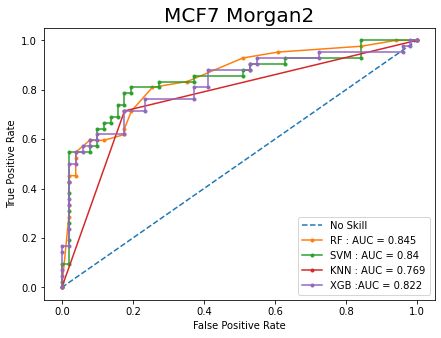

In [79]:
#all_roc(RF,SVM,KNN,XGB,y-Test,title)

RF  = prediction_mcf7_Morgan2_rf_probs
SVM = prediction_mcf7_Morgan2_svm_probs
KNN = prediction_mcf7_Morgan2_knn_probs
XGB = prediction_mcf7_Morgan2_xgb_probs
y_Test = y_Morgan2_test_mcf7
title="MCF7 Morgan2"

all_roc(RF,SVM,KNN,XGB,y_Test,title)

### Breast

In [80]:
best_model_rf_breast_Morgan2 = RandomForestClassifier(max_features='sqrt',n_estimators=23, random_state=1)

In [81]:
best_model_knn_breast_Morgan2=KNeighborsClassifier(n_neighbors =1)

In [82]:
best_model_SVM_breast_Morgan2=svm.SVC(C=8, gamma=0.022, random_state=1,probability=True)

In [83]:
best_model_xgb_breast_Morgan2 = XGBClassifier(use_label_encoder=False,n_estimators=39,gamma=0,random_state=1,eval_metric='error')

In [84]:
best_model_rf_breast_Morgan2.fit(X_Morgan2_train_breast, y_Morgan2_train_breast)
best_model_knn_breast_Morgan2.fit(X_Morgan2_train_breast, y_Morgan2_train_breast)
best_model_SVM_breast_Morgan2.fit(X_Morgan2_train_breast, y_Morgan2_train_breast)
best_model_xgb_breast_Morgan2.fit(np.array(X_Morgan2_train_breast), y_Morgan2_train_breast)

prediction_breast_Morgan2_rf_probs  = best_model_rf_breast_Morgan2.predict_proba(X_Morgan2_test_breast)
prediction_breast_Morgan2_knn_probs = best_model_knn_breast_Morgan2.predict_proba(X_Morgan2_test_breast)
prediction_breast_Morgan2_svm_probs = best_model_SVM_breast_Morgan2.predict_proba(X_Morgan2_test_breast)
prediction_breast_Morgan2_xgb_probs = best_model_xgb_breast_Morgan2.predict_proba(np.array(X_Morgan2_test_breast))

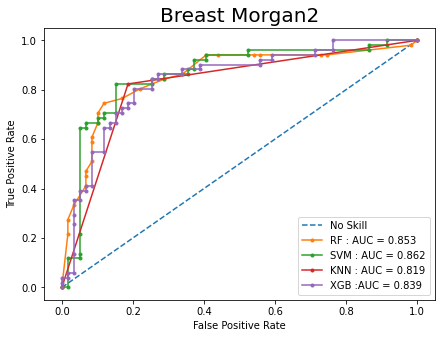

In [85]:
#all_roc(RF,SVM,KNN,XGB,y-Test,title)

RF  = prediction_breast_Morgan2_rf_probs
SVM = prediction_breast_Morgan2_svm_probs
KNN = prediction_breast_Morgan2_knn_probs
XGB = prediction_breast_Morgan2_xgb_probs
y_Test = y_Morgan2_test_breast
title="Breast Morgan2"

all_roc(RF,SVM,KNN,XGB,y_Test,title)

### Lung:

In [44]:
best_model_rf_lung_Morgan2 = RandomForestClassifier(criterion='entropy',max_features='sqrt', n_estimators=103, random_state=1)

In [45]:
best_model_knn_lung_Morgan2= KNeighborsClassifier(n_neighbors=1)

In [46]:
best_model_SVM_lung_Morgan2=svm.SVC(C=10, gamma=0.012, random_state=1,probability=True)

In [47]:
best_model_xgb_lung_Morgan2= XGBClassifier(use_label_encoder=False,n_estimators=94,gamma=0,random_state=1,eval_metric='error')

In [48]:
best_model_rf_lung_Morgan2.fit(X_Morgan2_train_lung, y_Morgan2_train_lung)
best_model_knn_lung_Morgan2.fit(X_Morgan2_train_lung, y_Morgan2_train_lung)
best_model_SVM_lung_Morgan2.fit(X_Morgan2_train_lung, y_Morgan2_train_lung)
best_model_xgb_lung_Morgan2.fit(np.array(X_Morgan2_train_lung), y_Morgan2_train_lung)

prediction_lung_Morgan2_rf_probs  = best_model_rf_lung_Morgan2.predict_proba(X_Morgan2_test_lung)
prediction_lung_Morgan2_knn_probs = best_model_knn_lung_Morgan2.predict_proba(X_Morgan2_test_lung)
prediction_lung_Morgan2_svm_probs = best_model_SVM_lung_Morgan2.predict_proba(X_Morgan2_test_lung)
prediction_lung_Morgan2_xgb_probs = best_model_xgb_lung_Morgan2.predict_proba(np.array(X_Morgan2_test_lung))

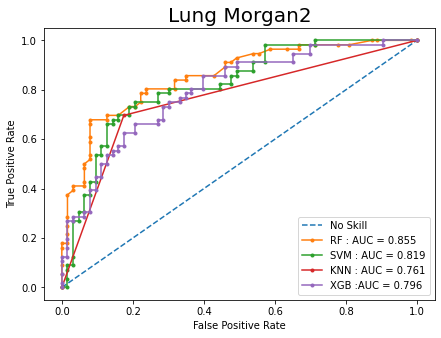

In [49]:
#all_roc(RF,SVM,KNN,XGB,y-Test,title)

RF  = prediction_lung_Morgan2_rf_probs
SVM = prediction_lung_Morgan2_svm_probs
KNN = prediction_lung_Morgan2_knn_probs
XGB = prediction_lung_Morgan2_xgb_probs
y_Test = y_Morgan2_test_lung
title="Lung Morgan2"

all_roc(RF,SVM,KNN,XGB,y_Test,title)

### A549

In [50]:
best_model_rf_a549_Morgan2 = RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=61, random_state=1)

In [51]:
best_model_knn_a549_Morgan2 = KNeighborsClassifier(n_neighbors=1)

In [52]:
best_model_SVM_a549_Morgan2 = svm.SVC(C=5, gamma=0.013, random_state=1,probability=True)

In [59]:
best_model_xgb_a549_Morgan2 = XGBClassifier(use_label_encoder=False,n_estimators=59,gamma=0,random_state=1,eval_metric='error')

In [60]:
best_model_rf_a549_Morgan2.fit(X_Morgan2_train_a549, y_Morgan2_train_a549)
best_model_knn_a549_Morgan2.fit(X_Morgan2_train_a549, y_Morgan2_train_a549)
best_model_SVM_a549_Morgan2.fit(X_Morgan2_train_a549, y_Morgan2_train_a549)
best_model_xgb_a549_Morgan2.fit(np.array(X_Morgan2_train_a549), y_Morgan2_train_a549)

prediction_a549_Morgan2_rf_probs  = best_model_rf_a549_Morgan2.predict_proba(X_Morgan2_test_a549)
prediction_a549_Morgan2_knn_probs = best_model_knn_a549_Morgan2.predict_proba(X_Morgan2_test_a549)
prediction_a549_Morgan2_svm_probs = best_model_SVM_a549_Morgan2.predict_proba(X_Morgan2_test_a549)
prediction_a549_Morgan2_xgb_probs = best_model_xgb_a549_Morgan2.predict_proba(np.array(X_Morgan2_test_a549))

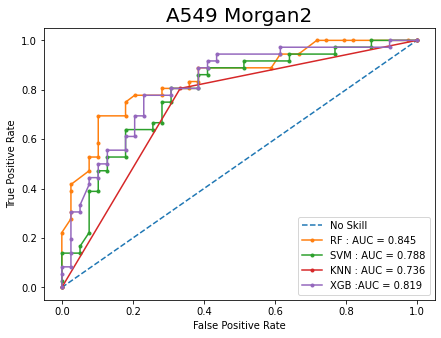

In [61]:
#all_roc(RF,SVM,KNN,XGB,y-Test,title)

RF  = prediction_a549_Morgan2_rf_probs
SVM = prediction_a549_Morgan2_svm_probs
KNN = prediction_a549_Morgan2_knn_probs
XGB = prediction_a549_Morgan2_xgb_probs
y_Test = y_Morgan2_test_a549
title="A549 Morgan2"

all_roc(RF,SVM,KNN,XGB,y_Test,title)

## END

In [24]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [25]:
lung

,NPACT_ID,Compound_Names,CanonicalSMILES,IsomericSMILES,Smiles,InchiKey,PubChem_ID,Cell Line,Cancer,Target,mol,Maccs,morg2_fp
0,NPACT02063,Withalongolide-D,CC1=C(C(=O)OC(C1)C(C)C2CCC3C2(CCC4C3CC5C6(C4(C...,CC1=C(C(=O)OC(C1)[C@@H](C)C2CCC3[C@@]2(CCC4C3C...,O1[C@@]23[C@@](C4C(C5[C@@](C(CC5)[C@@H](C5OC(=...,XGLFAAWROSMYJO-CLDFYNDNSA-N,56649373,MRC5,Lung,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,NPACT02060,tryptanthrin,C1=CC=C2C(=C1)C(=O)N3C4=CC=CC=C4C(=O)C3=N2,C1=CC=C2C(=C1)C(=O)N3C4=CC=CC=C4C(=O)C3=N2,O=C1c2n(c3c1cccc3)c(=O)c1c(n2)cccc1,VQQVWGVXDIPORV-UHFFFAOYSA-N,73549,NCI-H460,Lung,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,NPACT02058,Trilobacin,CCCCCCCCCCC(C1CCC(O1)C2CCC(O2)C(CCCCCCCCCCC(CC...,CCCCCCCCCCC(C1CCC(O1)C2CCC(O2)C(CCCCCCCCCCC(CC...,O1C(C2OC(CC2)C(O)CCCCCCCCCC)CCC1C(O)CCCCCCCCCC...,MBABCNBNDNGODA-UHFFFAOYSA-N,130056,A549,Lung,1,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,NPACT02056,Toxyloxanthone-B,CC1(C=CC2=C(O1)C(=CC3=C2C(=O)C4=C(C=C(C=C4O3)O...,CC1(C=CC2=C(O1)C(=CC3=C2C(=O)C4=C(C=C(C=C4O3)O...,O1C(C=Cc2c1c(O)cc1oc3c(c(=O)c21)c(O)cc(O)c3)(C)C,MFKYNKVEQUTJEH-UHFFFAOYSA-N,14886044,A549,Lung,0,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,NPACT02050,Squamotacin,CCCCCCCCCCCCC(C1CCC(O1)C2CCC(O2)C(CCCCCCCCC(CC...,CCCCCCCCCCCC[C@@H]([C@H]1CC[C@@H](O1)[C@H]2CC[...,O1[C@@H]([C@@H]2O[C@H](CC2)[C@@H](O)CCCCCCCCCC...,GXZZLWVQYXFTJE-LUVUIASKSA-N,9960733,A549,Lung,1,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,NPACT00477,Dalparvinene,COC1=C(C(=C(C=C1)CC=CC2=CC=C(C=C2)O)OC)O,COC1=C(C(=C(C=C1)C/C=C/C2=CC=C(C=C2)O)OC)O,c1cc(ccc1/C=C/Cc1c(c(c(cc1)OC)O)OC)O,VWMLOOICTOCUDD-ONEGZZNKSA-N,71454058,NCI-H187,Lung,1,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
588,NPACT00326,Beta-Mangostin,CC(=CCC1=C(C=C2C(=C1O)C(=O)C3=C(O2)C=C(C(=C3CC...,Not Found,c1c(c(cc2c1/C(=C/CC=C(C)C)/c1c(O2)cc(c(c1O)CCC...,XUBGVPPNJQYZTR-WQRHYEAKSA-N,5495925,NCI-H187,Lung,1,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
589,NPACT00213,Aculeatin A,CCCCCCCCCCCCCC1CC(CC2(O1)CCC3(O2)C=CC(=O)C=C3)O,CCCCCCCCCCCCC[C@@H]1C[C@H](C[C@@]2(O1)CCC3(O2)...,[C@]12(C=CC(=O)C=C1)O[C@]1(CC2)C[C@@H](O)C[C@H...,UAFRNLHPKTXIOW-BFLUCZKCSA-N,10409797,LU-1,Lung,1,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
590,NPACT00207,9-alpha-hydroxyparthenolide,CC1=CCCC2(C(O2)C3C(CC1O)C(=C)C(=O)O3)C,C/C/1=C/CCC2(C(O2)C3C(CC1O)C(=C)C(=O)O3)C,[C@@H]12CC[C@@]3([C@@H]([C@@H]4[C@H](C[C@@H]([...,LWONQONPHFIJAL-ZIOFTPENSA-N,5477074,NCI-H522,Lung,1,"<img data-content=""rdkit/molecule"" src=""data:i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [26]:
breast_maccs = to_bit(breast["Maccs"])
lung_maccs = to_bit(lung["Maccs"])
lung_morgan2 = to_bit(lung['morg2_fp'])

kmean = KMeans(random_state=1)
tsne=TSNE(random_state=1)

In [38]:
def clustering(X_tsne,inp):
    kmean_result = kmean.fit(X_tsne)
    labels_data = kmean.predict(X_tsne)
    print('For All :',Counting(kmean_result.labels_),'Total Length is',len(kmean_result.labels_))
    print('=========================================================================')
    Cluster = pd.DataFrame({
                            'Cluster':labels_data,
                            'NPACT_ID':inp['NPACT_ID'],
                            'Name':inp['Compound_Names'],
                            'Canonical Smiles':inp['CanonicalSMILES'],
                            'Target':inp['Target']
                            })
    print('For 1   :',Counting(Cluster[Cluster.Target.values==1]['Cluster']),'Length is',len(Cluster[Cluster.Target.values==1]['Cluster']))
    print('**********************************************************************')
    print('For 0   :',Counting(Cluster[Cluster.Target.values==0]['Cluster']),"Lenght is",len(Cluster[Cluster.Target.values==0]['Cluster']))
    print('=========================================================================')
    centroids = kmean_result.cluster_centers_
    labels = np.unique(kmean_result.labels_)
    marker = ['+','*','p','s','x','o','D','>']
    plt.figure(figsize=(12, 6))
    for i,j in zip(labels,marker):
        plt.scatter(X_tsne[labels_data == i , 0] , X_tsne[labels_data == i , 1] , label = i,marker=j)
        plt.text(centroids[i,0],centroids[i,1],s='Centroid - '+str(i),fontdict=dict(color='black',size=15))
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 70,color='black',marker='x')
    plt.xlabel('TSNE1',size=15)
    plt.ylabel('TSNE2',size=15)
    plt.title('T-SNE Clustering of Fingrprints:',size=20)
    plt.legend()
    plt.show()
    return(Cluster)
# To Show Active and Inactive Compundes:
def t_sne(X_tsne,inp):
    target_names = ['Active-1','Inactive-0']
    colors = ['green', 'red']
    plt.figure(figsize=(12, 6))
    y=inp.Target.values
    for color, i, target_name in zip(colors, [1,0], target_names):
            plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],color=color, lw=2, label=target_name)
    plt.title("T-SNE Scatter Plot :",size = 20)
    plt.legend(loc="best", shadow=True, scatterpoints=1)

### Breast Maccs:

For All : {0: 104, 1: 58, 2: 84, 3: 73, 4: 72, 5: 74, 6: 22, 7: 61} Total Length is 548
For 1   : {0: 36, 1: 7, 2: 72, 3: 29, 4: 26, 5: 40, 6: 14, 7: 29} Length is 253
**********************************************************************
For 0   : {0: 68, 1: 51, 2: 12, 3: 44, 4: 46, 5: 34, 6: 8, 7: 32} Lenght is 295


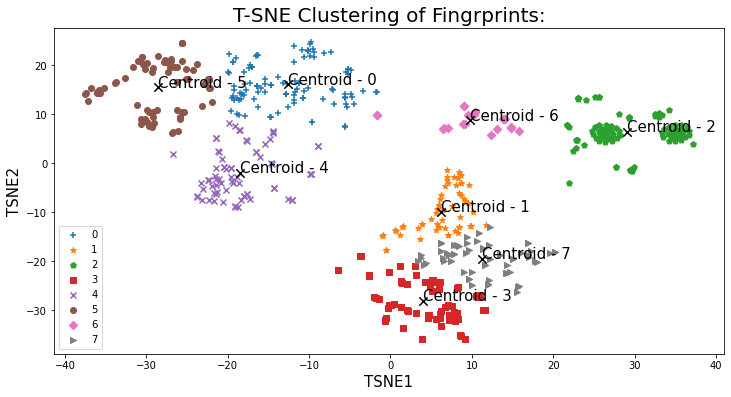

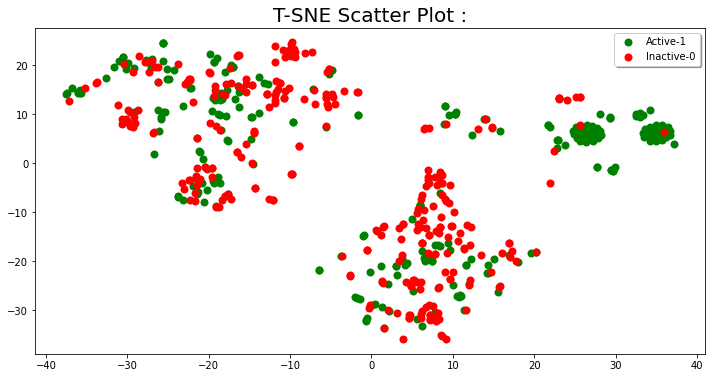

In [39]:
X_tsne_macc = tsne.fit_transform(breast_maccs)
cluster_breast_maccs = clustering(X_tsne_macc,breast)
t_sne(X_tsne_macc,breast)

### Lung Maccs:

For All : {0: 63, 1: 81, 2: 95, 3: 92, 4: 42, 5: 85, 6: 78, 7: 56} Total Length is 592
For 1   : {0: 32, 1: 33, 2: 39, 3: 74, 4: 20, 5: 45, 6: 28, 7: 9} Length is 280
**********************************************************************
For 0   : {0: 31, 1: 48, 2: 56, 3: 18, 4: 22, 5: 40, 6: 50, 7: 47} Lenght is 312


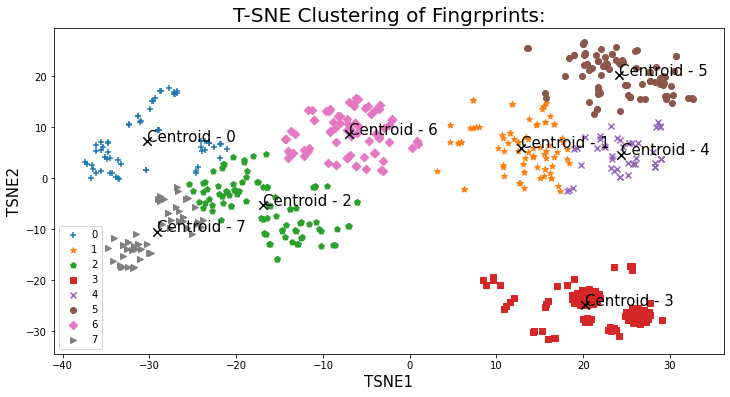

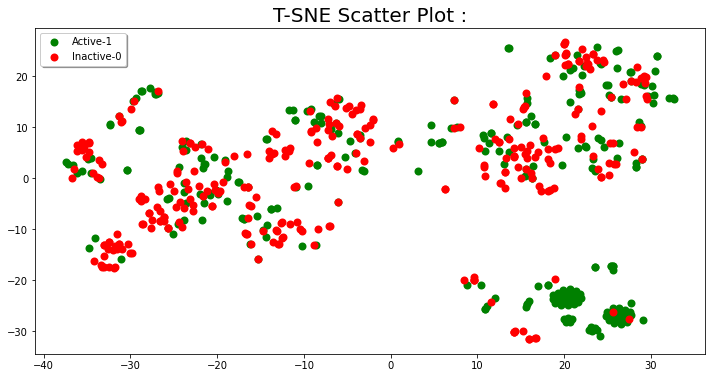

In [40]:
X_tsne_macc = tsne.fit_transform(lung_maccs)
cluster_lung_maccs = clustering(X_tsne_macc,lung)
t_sne(X_tsne_macc,lung)

### Lung Morgan2:

For All : {0: 62, 1: 107, 2: 77, 3: 94, 4: 70, 5: 86, 6: 69, 7: 27} Total Length is 592
For 1   : {0: 24, 1: 36, 2: 32, 3: 34, 4: 68, 5: 43, 6: 31, 7: 12} Length is 280
**********************************************************************
For 0   : {0: 38, 1: 71, 2: 45, 3: 60, 4: 2, 5: 43, 6: 38, 7: 15} Lenght is 312


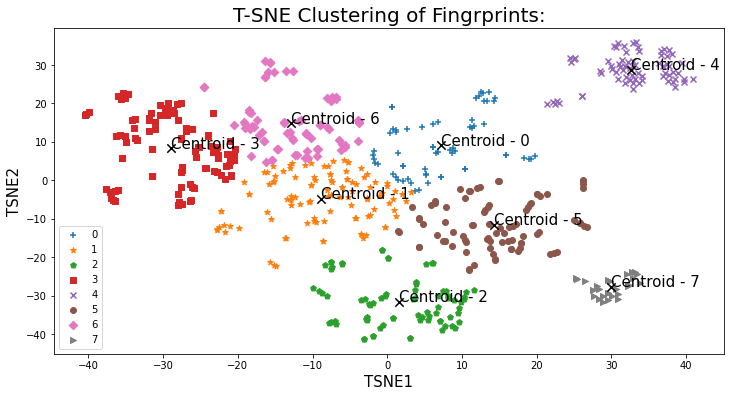

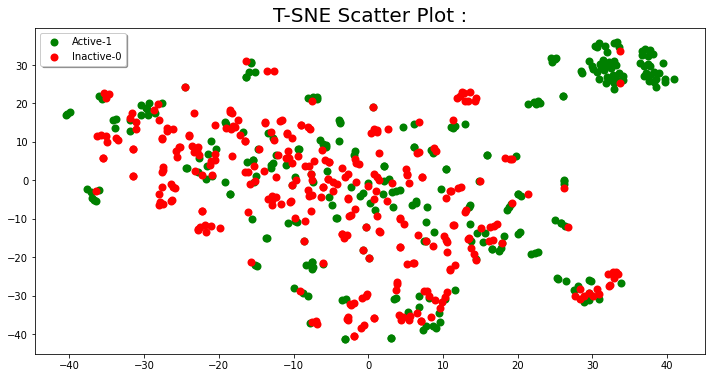

In [41]:
X_tsne_morgan2 = tsne.fit_transform(lung_morgan2)
cluster_lung_morgan2 = clustering(X_tsne_morgan2,lung)
t_sne(X_tsne_morgan2,lung)

In [42]:
cluster_breast_maccs.to_csv('Cluster_Breast_Maccs.csv')

In [43]:
cluster_lung_maccs.to_csv('Cluster_Lung_Maccs.csv')